# ¿Cuál es la mejor tarifa?

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames


calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Revisando nuestro dataset, nos podemos dar cuenta que hay datos que están en MB y otros en GB. Para unificar la información, ya tenemos una columna que nos indica que está medido en GB ("usd_per_gb"), por lo cual es conveniente transformar la columna "mb_per_month_included" a "gb_per_month_included".

## Corregir datos

In [5]:
plans['gb_included'] = plans['mb_per_month_included'] / 1024
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_included  
0         15.0  
1         30.0  


## Enriquecer los datos

In [6]:
# Por ahora no es necesario enriquecer los datos de este dataset.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


En nuestro dataset de usaurios nos podemos dar cuenta que 'reg_date' y 'churn_date' no están en formato de fecha, por lo cual vamos a proceder a darles formato. Adicionalmente, verificamos que no hayan duplicados para 'user_id' y que los nombres de las ciudades en 'city', no tengan espacios no deseados, para lo cual usamos el método .strip().

### Corregir los datos

In [9]:
# Podemos darle formato de fecha a 'reg-date' y a 'churn_date'

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [10]:
# Como tenemos separación con guines en los nombres de ciudad, procedemos a quietar los guiones
users['city'] = users['city'].str.strip()

In [11]:
# Revisamos si hay usuarios duplicados
users.duplicated(subset='user_id').sum()

0

### Enriquecer los datos

In [12]:
# Podemos usar 'churn_date' para crear una columna que nos indique qué usuarios están activos y cuáles no.
users['active'] = users['churn_date'].isna()

In [13]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Lo mismo que hicimos en los anteriores datasets, identificamos que 'call_date' no tiene formato fecha, así que pocedemos dárselo con .to_datetime().
Por otra parte, se hace bastante conveniente extraer el mes de esta columna, ya que nos va a servir para nuetro análisis.

### Corregir los datos

In [16]:
# Queremos poner en formato datetime 'call_date', ya que actualmente es formato object
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

In [17]:
# Creamos la columna month en el dataset calls
calls['month'] = calls['call_date'].dt.month

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Al igual que hicimos con nuestro dataser de calls, en el de messages cogemos la columna 'message_date' y le damos formato de fecha con .to_datetime(). Adicionalmente, extraemos el mes de esta columna para nuetro análisis posterior.

### Corregir los datos

In [20]:
# Pasamos a formato datetime la columna 'message_date'
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

In [21]:
# Creamos la columna de mes para el dataset messages
messages['month'] = messages['message_date'].dt.month

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Finalmente, en nuestro dataset internet le damos formato de fecha 'session_date' y extraemos el mes para mayor facilidad en el análisis de los datos.
Adicionalmente, como la columna 'mb_used' está en MB, pero lo demás está en GB, procedemos a agregar una columna que nos diga cuantos GB ha usado cada usuario y lo extraemos en la columna 'gb_used'.

### Corregir los datos

In [24]:
# Pasamos a formato datetime la columna 'session_date'
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [25]:
# Pasamos 'mb_used' a GB
internet['gb_used'] = internet['mb_used'] / 1024
print(internet.head())

         id  user_id session_date  mb_used   gb_used
0   1000_13     1000   2018-12-29    89.86  0.087754
1  1000_204     1000   2018-12-31     0.00  0.000000
2  1000_379     1000   2018-12-28   660.40  0.644922
3  1000_413     1000   2018-12-26   270.99  0.264639
4  1000_442     1000   2018-12-27   880.22  0.859590


### Enriquecer los datos

In [26]:
# Creamos la columna de mes para el dataset internet
internet['month'] = internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_monthly = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_monthly.head()

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [29]:

# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_monthly = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_monthly. head()


,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_monthly = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_monthly.head()

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_monthly = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
internet_monthly.head()

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)
calls_monthly.rename(columns={'id':'calls_made'}, inplace=True)
total_monthly = calls_monthly.merge(messages_monthly, how='outer', on=['user_id', 'month']).merge(internet_monthly, how='outer', on=['user_id', 'month'])

In [33]:
# Unimos la base anterior con las de minutes_monthly
total_monthly = total_monthly.merge(minutes_monthly, how='outer', on=['user_id', 'month'])

In [34]:
# Añade la información de la tarifa
users.rename(columns={'plan':'plan_name'}, inplace=True)
users = users[['user_id', 'plan_name', 'city']]
total_monthly = total_monthly.merge(users, how='outer', on='user_id')

In [35]:
# Anadimos la información de los planes
total_monthly = total_monthly.merge(plans, on='plan_name', how='outer')

In [36]:
# Rellenamos los valores ausentes por cero (0)
total_monthly = total_monthly.fillna(0)
total_monthly.head()

,user_id,month,calls_made,messages_sent,gb_used,duration,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
0,1000,12.0,16.0,11.0,1.856904,116.83,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
1,1006,11.0,2.0,15.0,2.019893,9.32,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
2,1006,12.0,9.0,139.0,31.366035,54.79,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
3,1008,10.0,71.0,21.0,16.706045,450.21,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0
4,1008,11.0,63.0,37.0,23.121797,422.81,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0


In [37]:
total_monthly.columns

Index(['user_id', 'month', 'calls_made', 'messages_sent', 'gb_used',
       'duration', 'plan_name', 'city', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_included'],
      dtype='object')

In [38]:

# Calcula el ingreso mensual para cada usuario


total_monthly['mes_check'] = (total_monthly['messages_sent'] - total_monthly['messages_included']).clip(lower=0)
total_monthly['call_check'] = (total_monthly['duration'] - total_monthly['minutes_included']).clip(lower=0)
total_monthly['int_check'] = np.ceil((total_monthly['gb_used'] - total_monthly['gb_included']).clip(lower=0))

total_monthly['revenue'] = total_monthly['usd_monthly_pay'] + total_monthly['mes_check']*total_monthly['usd_per_message'] + total_monthly['call_check']*total_monthly['usd_per_minute'] + total_monthly['int_check']*total_monthly['usd_per_gb']


In [39]:
total_monthly[['user_id', 'month','mes_check', 'call_check', 'int_check', 'revenue']].head()

,user_id,month,mes_check,call_check,int_check,revenue
0,1000,12.0,0.0,0.0,0.0,70.0
1,1006,11.0,0.0,0.0,0.0,70.0
2,1006,12.0,0.0,0.0,2.0,84.0
3,1008,10.0,0.0,0.0,0.0,70.0
4,1008,11.0,0.0,0.0,0.0,70.0


## Estudia el comportamiento de usuario

### Llamadas

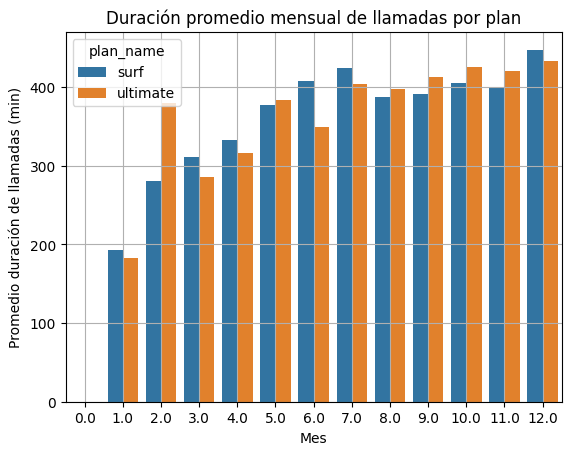

In [40]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
av_duration_call = total_monthly.groupby(['plan_name', 'month'])['duration'].mean().reset_index()
av_duration_call = av_duration_call.rename(columns={'duration':'av_duration'})
sns.barplot(data=av_duration_call, x='month', y='av_duration', hue='plan_name')
plt.title('Duración promedio mensual de llamadas por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio duración de llamadas (min)')
plt.grid()
plt.show()

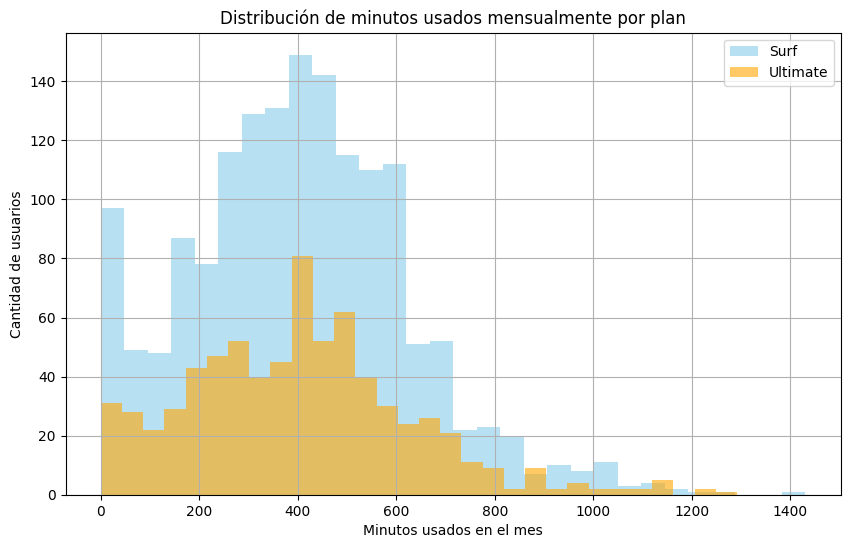

In [41]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf = total_monthly[total_monthly['plan_name'] == 'surf']
ultimate = total_monthly[total_monthly['plan_name'] == 'ultimate']
plt.figure(figsize=(10,6))
surf['duration'].plot(kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')
ultimate['duration'].plot(kind='hist', bins=30, alpha=0.6, label='Ultimate', color='orange')
plt.title('Distribución de minutos usados mensualmente por plan')
plt.xlabel('Minutos usados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True)
plt.show()

In [42]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_stats = total_monthly.groupby('plan_name')['duration'].agg(['mean', 'var', 'std']).reset_index()
call_stats.columns = ['plan', 'mean_duration', 'var_duration', 'std_duration']
call_stats

,plan,mean_duration,var_duration,std_duration
0,surf,403.224345,49568.849927,222.640630
1,ultimate,403.948923,52263.047679,228.611128


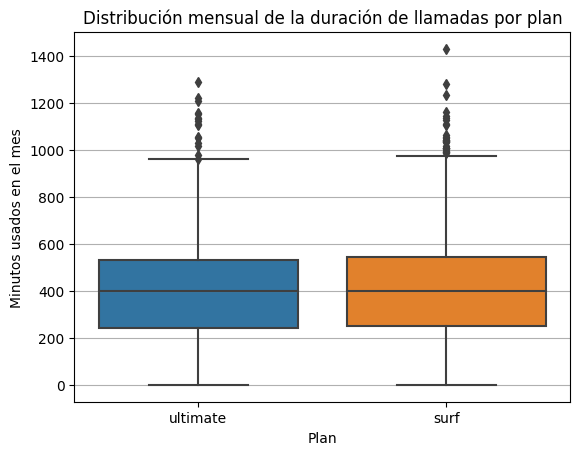

In [43]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=total_monthly, x='plan_name', y='duration')

plt.title('Distribución mensual de la duración de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados en el mes')
plt.grid(axis='y')
plt.show()

En nuestro gráfico de barras podemos notar una tendencia ascendente en la duración promedio mensual de llamadas de ambos planes (Surf y Ultimate) a lo largo del año. Port tanto, podemos decir que los usuarios de ambos planes hacen llamadas con una duración media bastante parecida mes a mes.

En cuanto a nuestro histograma, podemos ver que para ambos planes, el pico más pronunciado se centra alrededor de los 400 minutos, indicando que la mayoría de los usuarios tienden a consumir esa cantidad de minutos al mes. Por otra parte, podemos notar que hay más dispersión hacia la derecha y algunos usuarios llegan a usar más de 1000 minutos al mes. Este comportamiento nos lo corrobora nuestra tabla de media, varianza y desviación standard, en la que nos dice que la duración promedio mensual es prácticamente igual en ambos planes (403 minutos). Lo mismo con la varianza y desviación estándar también son muy similares, lo que indica que no hay diferencias estadísticas grandes entre ambos grupos en cuanto a la duración mensual de llamadas.

Finalmente, en nuestro gráfico de caja ambos planes tienen una distribución similar, con mediana alrededor de los 400 minutos, en donde se concentra la mayor cantidad de usuarios en el primer cuartirl del plan y en menor medida en el segundo segmento del intervalo intercuartílico, y se dispersa mucho más hacia cerca los 1000 minutos (donde termina el bigote superior). Por lo cual, podemos concluir que, aunque hay valores atípicos, la distribución general de la duración de llamadas es muy similar en ambos planes.

### Mensajes

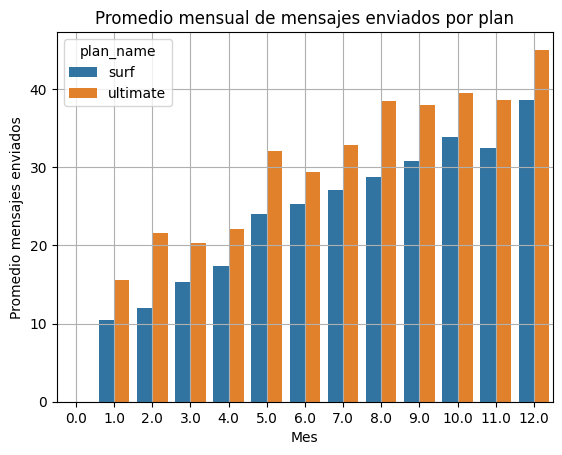

In [44]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

av_messages = total_monthly.groupby(['plan_name', 'month'])['messages_sent'].mean().reset_index()
av_messages = av_messages.rename(columns={'messages_sent':'av_sms'})
sns.barplot(data=av_messages, x='month', y='av_sms', hue='plan_name')
plt.title('Promedio mensual de mensajes enviados por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio mensajes enviados')
plt.grid()
plt.show()

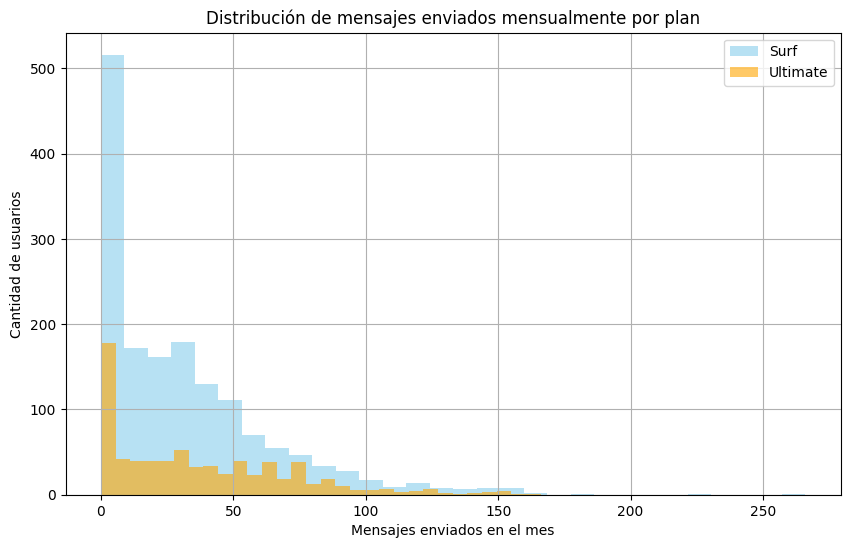

In [45]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

surf = total_monthly[total_monthly['plan_name'] == 'surf']
ultimate = total_monthly[total_monthly['plan_name'] == 'ultimate']
plt.figure(figsize=(10,6))
surf['messages_sent'].plot(kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')
ultimate['messages_sent'].plot(kind='hist', bins=30, alpha=0.6, label='Ultimate', color='orange')
plt.title('Distribución de mensajes enviados mensualmente por plan')
plt.xlabel('Mensajes enviados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True)
plt.show()

In [46]:

call_stats = total_monthly.groupby('plan_name')['messages_sent'].agg(['mean', 'var', 'std']).reset_index()
call_stats.columns = ['plan', 'mean_smssent', 'var_smssent', 'std_smssent']
call_stats

,plan,mean_smssent,var_smssent,std_smssent
0,surf,31.041165,1126.118076,33.557683
1,ultimate,37.343923,1209.827612,34.782576


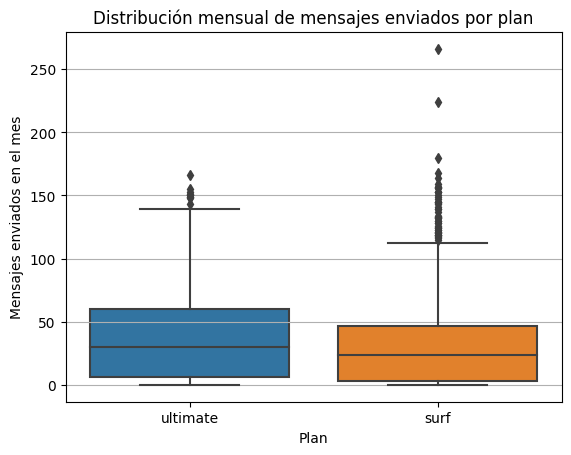

In [47]:
sns.boxplot(data=total_monthly, x='plan_name', y='messages_sent')

plt.title('Distribución mensual de mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados en el mes')
plt.grid(axis='y')
plt.show()

En nuestro gráfico de barras podemos notar que los usuarios del plan Ultimate tienden a enviar más mensajes mensualmente en promedio que los del plan Surf, sin embargo, ambos grupos muestran una tendencia creciente en el número de mensajes enviados a lo largo de los meses. Adicionalmente, el número promedio de mensajes enviados por los usuarios del plan Surf es consistentemente inferior en cada mes respecto a los del plan Ultimate.

La mayoría de los usuarios de ambos planes envían pocos mensajes al mes (alrededor de 30 mensajes), pero esto es más evidente en el plan Surf. Del mismo modo, podemos ver que la cola de la tendencia va hacia la derecha, lo que indica que hay usuarios que envían más mensajes (entre 100 y 200). Esto lo podemos ver en las estadísticas descriptivas, donde nos muestra que los usuarios de Ultimate envían, en promedio, 6 mensajes más por mes, y la varianza y la desviación estándar son similares, lo que indica que ambos planes tienen una variabilidad comparable en el número de mensajes enviados.

Finalmente, en nuestro gráfico de caja los valores atípicos son numerosos en ambos planes, especialmente el Surf, lo que sugiere que algunos usuarios envían muchos más mensajes que el resto. Adicionalmente, la mediana de mensajes es ligeramente más alta en el plan Ultimate, y su intervalo intercuartílico también es mayor, lo que refuerza la conclusión de un mayor uso de mesnajes en este plan.

### Internet

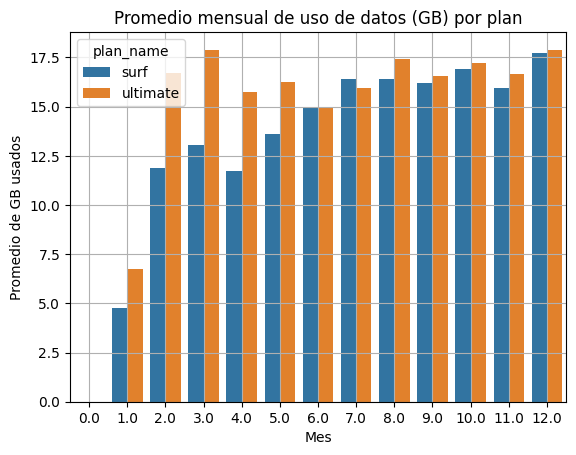

In [48]:
av_gb = total_monthly.groupby(['plan_name', 'month'])['gb_used'].mean().reset_index()
av_gb = av_gb.rename(columns={'gb_used': 'av_gbs'})
sns.barplot(data=av_gb, x='month', y='av_gbs', hue='plan_name')
plt.title('Promedio mensual de uso de datos (GB) por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de GB usados')
plt.grid()
plt.show()

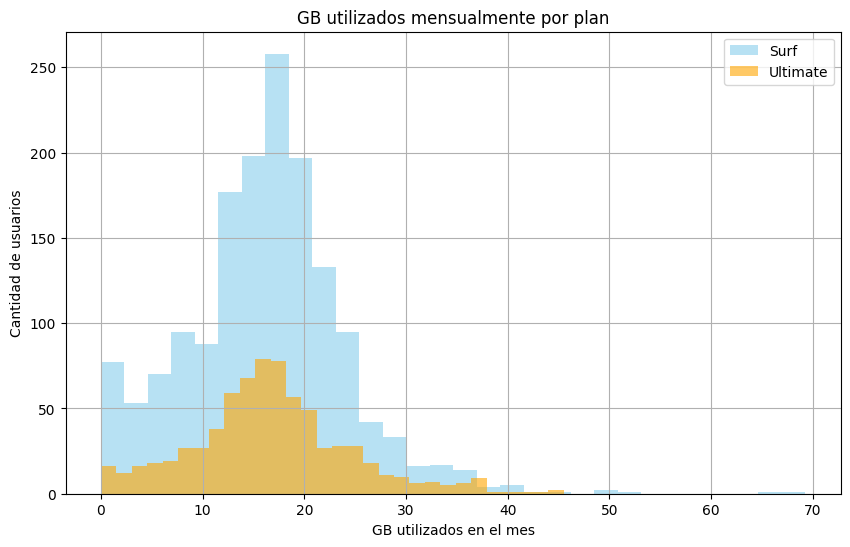

In [49]:
surf = total_monthly[total_monthly['plan_name'] == 'surf']
ultimate = total_monthly[total_monthly['plan_name'] == 'ultimate']
plt.figure(figsize=(10,6))
surf['gb_used'].plot(kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')
ultimate['gb_used'].plot(kind='hist', bins=30, alpha=0.6, label='Ultimate', color='orange')
plt.title('GB utilizados mensualmente por plan')
plt.xlabel('GB utilizados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True)
plt.show()

In [50]:
call_stats = total_monthly.groupby('plan_name')['gb_used'].agg(['mean', 'var', 'std']).reset_index()
call_stats.columns = ['plan', 'mean_gbused', 'var_gbused', 'std_gbused']
call_stats

,plan,mean_gbused,var_gbused,std_gbused
0,surf,16.108754,61.999095,7.873950
1,ultimate,16.718350,60.025862,7.747636


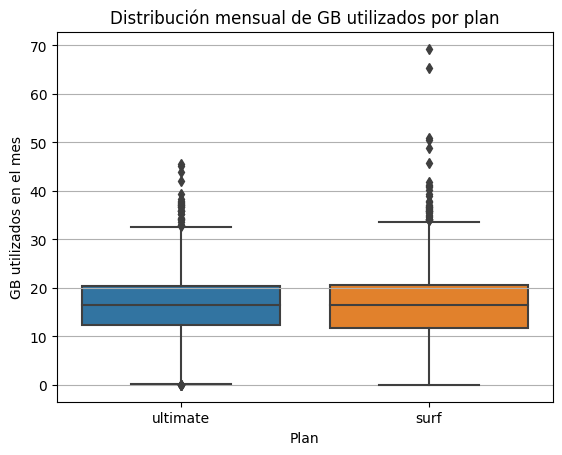

In [51]:
sns.boxplot(data=total_monthly, x='plan_name', y='gb_used')

plt.title('Distribución mensual de GB utilizados por plan')
plt.xlabel('Plan')
plt.ylabel('GB utilizados en el mes')
plt.grid(axis='y')
plt.show()

En el gráfico de barras podemos notar que los usuarios del plan Ultimate utilizan más GB que los del plan Surf, sobretodo en los primeros meses (de febrero a abril). Sin embargo, la tendencia del uso de internet en el plan Surf es creciente en la primera mitad del año y luego se estabiliza en la segunda mitad, mientras que en el plan Ultimate el uso de datos es más bien constante y un poco más alta en el primer período del año que en el resto.

Viendo nuestro histograma, podemos ver que la mayoría de los usuarios de ambos planes utilizan en promedio 16 GB en su plan de internet, y su distribución en el su uso es normal. Esto lo podemos evidenciar en las estadísticas descriptivas, donde nos muestra que los usuarios de ambos planes tienen una varianza y una desviación estandar no tan alta, lo que nos puede indicar que, a pesar de que haya usuarios utilizando más o menos datos, no es significativamente diferente al uso promedio de internet.

Finalmente, en nuestro gráfico de caja los valores atípicos son numerosos en el Surf, lo que sugiere que algunos usuarios utilizan mucho más internet que el resto. Adicionalmente, la mediana de GB es igual en ambos planes, y su intervalo intercuartílico también es muy similar, lo que nos permite confirmar que los usuarios de internet en ambos planes se comportan de manera muy parecida.

## Ingreso

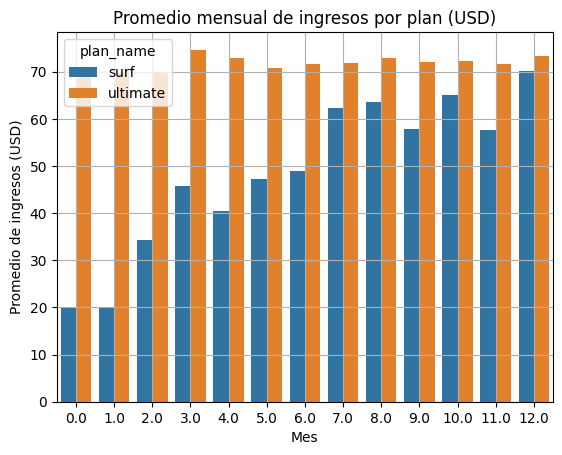

In [52]:
av_inc = total_monthly.groupby(['plan_name', 'month'])['revenue'].mean().reset_index()
av_inc = av_inc.rename(columns={'revenue': 'av_inc'})
sns.barplot(data=av_inc, x='month', y='av_inc', hue='plan_name')
plt.title('Promedio mensual de ingresos por plan (USD)')
plt.xlabel('Mes')
plt.ylabel('Promedio de ingresos (USD)')
plt.grid()
plt.show()

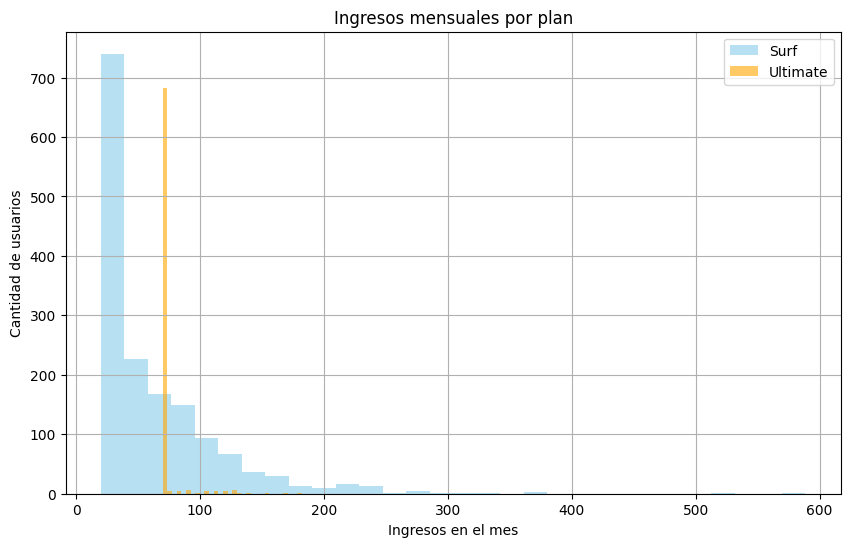

In [53]:
surf = total_monthly[total_monthly['plan_name'] == 'surf']
ultimate = total_monthly[total_monthly['plan_name'] == 'ultimate']
plt.figure(figsize=(10,6))
surf['revenue'].plot(kind='hist', bins=30, alpha=0.6, label='Surf', color='skyblue')
ultimate['revenue'].plot(kind='hist', bins=30, alpha=0.6, label='Ultimate', color='orange')
plt.title('Ingresos mensuales por plan')
plt.xlabel('Ingresos en el mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True)
plt.show()

In [54]:
# Hacemos lo mismo para los ingresos
revenue_stats = total_monthly.groupby('plan_name')['revenue'].agg(['mean', 'var', 'std']).reset_index()
revenue_stats.columns = ['plan', 'revenue_mean', 'revenue_var', 'revenue_std']
revenue_stats

,plan,revenue_mean,revenue_var,revenue_std
0,surf,60.174107,3048.503601,55.213256
1,ultimate,72.301105,129.159556,11.364839


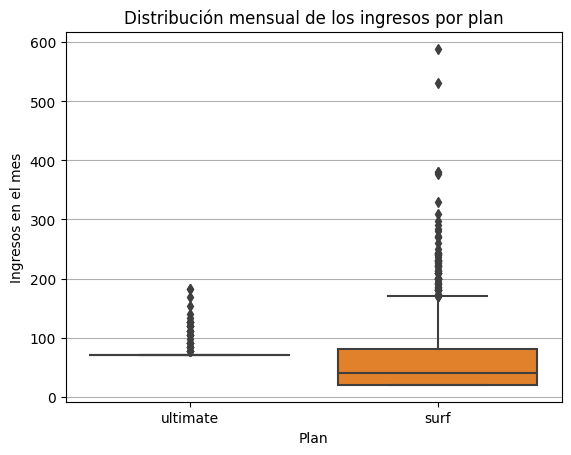

In [55]:
sns.boxplot(data=total_monthly, x='plan_name', y='revenue')

plt.title('Distribución mensual de los ingresos por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos en el mes')
plt.grid(axis='y')
plt.show()

En el gráfico de barras podemos notar que los usuarios del plan Ultimate generan un ingreso más alto en promedio que los del plan Surf. Esto es de esperar si el plan Ultimate tiene un costo mensual base más elevado o incluye servicios adicionales.

En nuestro histograma, no se evidencia claramente esto, pero podemos darnos cuenta de que la mayoría de los usuarios se concentran en el plan Surf y la otra parte en el plan Ultimate. Sin embargo, en nuestras estadísticas podemos confirmar lo que evidenciamos en nuestro gráfico de barras, donde vemos que el plan Ultimate genera la mayor parte de los ingresos mensuales. Adicionalmente, el plan Surf presenta una varianza y desviación estándar mucho más altas que Ultimate, indicando que los ingresos mensuales por usuario del plan Surf son altamente variables.En cambio, los usuarios del plan Ultimate generan ingresos mucho más estables, lo que podemos ver en nuestro histograma. 

Finalmente, en nuestro gráfico de caja vemos algo muy particular, y es que en el plan Ultimate no hay intervalo intercuartílico, sino que se concentra todo en la mediana. Esto nos confirma el comportamiento visto en los anteriores gráficos, donde este plan es el que aporta la mayor parte de los ingresos y más consistentemente mes a mes. Asimismo, sus valores atípicos, a pesar de estar dispersos en más de 100 usd al mes, están bastante más concentrados que en el plan Surf.

## Prueba las hipótesis estadísticas

In [56]:
# Prueba las hipótesis, debemos probar:

# Hipótesis nula (H0): El ingreso promedio de los usuarios de Surf y Ultimate es el mismo.
# Hipótesis alternativa (H1): El ingreso promedio de los usuarios de Surf y Ultimate es diferente.

# Filtrar los ingresos por plan
surf_income = total_monthly[total_monthly['plan_name'] == 'surf']['revenue']
ultimate_income = total_monthly[total_monthly['plan_name'] == 'ultimate']['revenue']

# Realizamos la prueba t de Student:
alpha = 0.05
results = st.ttest_ind(surf_income, ultimate_income, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos de los planes.')
else:
    print('No se puede rechazar la hipótesis nula: no hay evidencia de diferencia significativa en los ingresos.')

p-value: 1.3155784050676933e-16
Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos de los planes.


In [57]:
# Queremos ver cómo aparece el nombre de las ciudades en NY_NJ
sorted(total_monthly['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

In [58]:
# Prueba las hipótesis

# Hipótesis nula (H0): El ingreso promedio de los usuarios de NY-NJ es igual al de otras regiones.
# Hipótesis alternativa (H1): El ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.

# Creamos una nueva columna llamada 'region' usando np.where
total_monthly['region'] = np.where(total_monthly['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'NY-NJ', 'Other')
# Separamos los ingresos
ny_income = total_monthly[total_monthly['region'] == 'NY-NJ']['revenue']
other_income = total_monthly[total_monthly['region'] == 'Other']['revenue']
# Realizamos la prueba t de Student:
alpha = 0.05
results = st.ttest_ind(ny_income, other_income, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: hay diferencia significativa en el ingreso entre NY-NJ y otras regiones.')
else:
    print('No se puede rechazar la hipótesis nula: no hay evidencia de diferencia significativa en el ingreso de ambas regiones.')

p-value: 0.03607753502263239
Rechazamos la hipótesis nula: hay diferencia significativa en el ingreso entre NY-NJ y otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En términos de duración promedio mensual de llamadas, no hay una diferencia significativa entre los planes "Surf" y "Ultimate". Ambos grupos de usuarios se comportan de manera muy similar en promedio.

La principal diferencia se observa en la dispersión del uso: el plan Surf tiene más variabilidad en el comportamiento de los usuarios. El plan Ultimate presenta una distribución más estable y uniforme del uso de minutos.

El tipo de plan no influye significativamente en la duración promedio de llamadas. Sin embargo, el plan Surf parece atraer a usuarios con patrones de uso más diversos.

Los usuarios del plan Ultimate tienden a enviar más mensajes que los del plan Surf, tanto en promedio como en la mediana mensual.

Aunque la distribución general es similar, los usuarios del plan Ultimate muestran una mayor actividad de mensajería. Esto puede estar relacionado con las características del plan, como un mayor número de mensajes incluidos o beneficios que incentivan su uso.

El uso promedio de datos es apenas mayor en el plan Ultimate, pero la diferencia es tan pequeña que no permite concluir que un plan fomente un mayor uso de datos.

La variabilidad del uso de datos es alta en ambos planes, lo que indica que algunos usuarios consumen muy poco y otros mucho, sin importar el plan.

El comportamiento de los usuarios respecto al uso de internet es muy similar entre los dos planes, tanto en términos de promedio como de dispersión.

El plan Ultimate genera más ingresos por usuario en promedio que el plan Surf.

El ingreso por usuario en Ultimate es más estable (menor desviación estándar), probablemente porque se trata de un plan con tarifa fija.

El ingreso en el plan Surf es mucho más variable, lo que sugiere que algunos usuarios pagan solo el mínimo y otros terminan pagando mucho más por consumo extra.

Desde la perspectiva del negocio, el plan Surf puede ser más impredecible en ingresos pero potencialmente más lucrativo si los usuarios exceden sus límites. El plan Ultimate es más predecible, aunque con un tope más claro.